In [180]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lsc

In [4]:
df=pd.read_csv("test_data_1.csv", header=None,names=["movie_id", "user_id","rating"])
df.head()

,movie_id,user_id,rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3


In [9]:
df1 = df[df["movie_id"]==1].drop(["movie_id"],axis=1)
df1.head()

,user_id,rating
0,1488844,3
1,822109,5
2,885013,4
3,30878,4
4,823519,3


In [10]:
df2 = df[df["movie_id"]==2].drop(["movie_id"],axis=1)
df2.head()

,user_id,rating
547,2059652,4
548,1666394,3
549,1759415,4
550,1959936,5
551,998862,4


In [32]:
df_join = df1.merge(df2, on="user_id",how="outer")
df_join.head(10)

,user_id,rating_x,rating_y
0,1488844,3.0,NaN
1,822109,5.0,NaN
2,885013,4.0,NaN
3,30878,4.0,NaN
4,823519,3.0,NaN
5,893988,3.0,NaN
6,124105,4.0,NaN
7,1248029,3.0,NaN
8,1842128,4.0,NaN
9,2238063,3.0,NaN


In [33]:
df_join.dropna()

,user_id,rating_x,rating_y
93,636262,1.0,1.0
101,2439493,1.0,1.0
163,1374216,2.0,1.0
216,1664010,5.0,4.0
327,305344,1.0,1.0
417,1398626,2.0,3.0
434,1806515,3.0,3.0
436,2118461,5.0,4.0
442,387418,1.0,1.0
516,515436,1.0,1.0


In [43]:
x1=list(df_join.dropna()["rating_x"])
x2=list(df_join.dropna()["rating_y"])

In [44]:
x1

[1.0, 1.0, 2.0, 5.0, 1.0, 2.0, 3.0, 5.0, 1.0, 1.0]

In [45]:
x2

[1.0, 1.0, 1.0, 4.0, 1.0, 3.0, 3.0, 4.0, 1.0, 1.0]

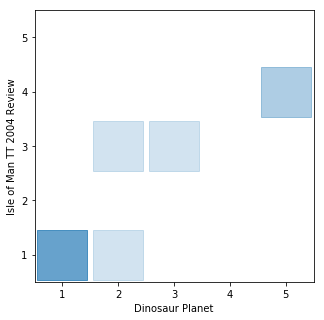

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(x1,x2,alpha=0.2,marker="s",s=2500)
plt.xlim(0.5,5.5)
plt.ylim(0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [62]:
x1a=list(df_join.fillna(0)["rating_x"])
x2a=list(df_join.fillna(0)["rating_y"])

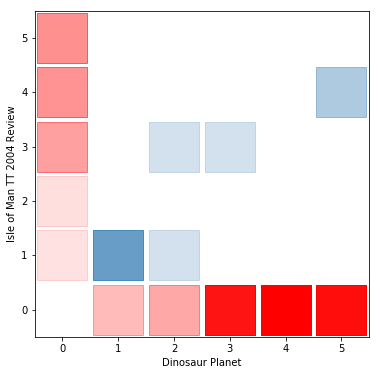

In [76]:
plt.figure(figsize=(6,6))
plt.scatter(x1a,x2a,alpha=0.01,marker="s",s=2500,c="r")
plt.scatter(x1,x2,alpha=0.2,marker="s",s=2500)
plt.xlim(-0.5,5.5)
plt.ylim(-0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [77]:
def plot_compare(df, col1="rating_x",col2="rating_y",use_na=True, alpha_main=0.2, alpha_na=0.01,xlabel="",ylabel=""):
    x1=list(df.dropna()[col1])
    x2=list(df.dropna()[col2])
    
    size = 6 if use_na else 5
    plt.figure(figsize=(size,size))
    
    if use_na:
        x1a=list(df.fillna(0)[col1])
        x2a=list(df.fillna(0)[col2])
        plt.scatter(x1a,x2a,alpha=alpha_na,marker="s",s=2500,c="r")
        
    plt.scatter(x1,x2,alpha=0.2,marker="s",s=2500)
    plt.xlim(5.5-size,5.5)
    plt.ylim(5.5-size,5.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

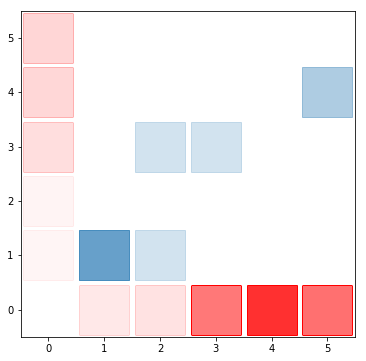

In [92]:
plot_compare(df_join,use_na=True,alpha_na=0.005)

In [124]:
def jitter(input_list, amount=0.7):
    return np.random.sample([len(input_list)])*amount+np.array(input_list)-amount/2

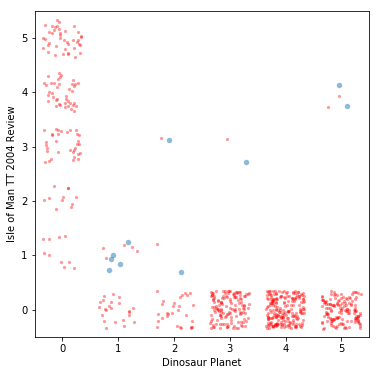

In [126]:
plt.figure(figsize=(6,6))
plt.scatter(jitter(x1a),jitter(x2a),alpha=0.4,marker="o",s=10,c="r",linewidths=0)
plt.scatter(jitter(x1),jitter(x2),alpha=0.5,marker="o",s=30,linewidths=0)
plt.xlim(-0.5,5.5)
plt.ylim(-0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [130]:
dfs=pd.Series([(x1a[i],x2a[i]) for i in np.arange(len(x1a))]).value_counts()
dfs

(4.0, 0.0)    207
(5.0, 0.0)    143
(3.0, 0.0)    135
(0.0, 5.0)     41
(0.0, 4.0)     40
(0.0, 3.0)     33
(2.0, 0.0)     29
(1.0, 0.0)     23
(0.0, 2.0)     11
(0.0, 1.0)     10
(1.0, 1.0)      5
(5.0, 4.0)      2
(2.0, 3.0)      1
(3.0, 3.0)      1
(2.0, 1.0)      1
dtype: int64

In [138]:
def plot_compare_df(df, id1, id2, use_na=True, alpha_main=0.2, alpha_na=0.01):
    df1 = df[df["movie_id"]==id1].drop(["movie_id"],axis=1)
    df2 = df[df["movie_id"]==id2].drop(["movie_id"],axis=1)
    df_join = df1.merge(df2, on="user_id",how="outer")
    
    plot_compare(df_join, use_na=use_na, alpha_main=alpha_main, alpha_na=alpha_na)

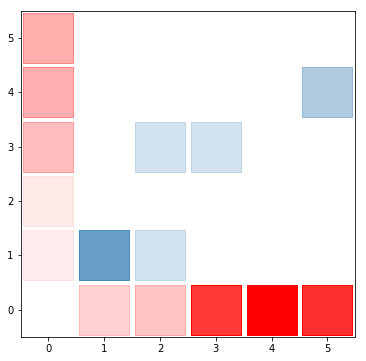

In [144]:
plot_compare_df(df, 1,2,alpha_na=0.006)

In [161]:
df_join.loc[(df_join.rating_x==1)&(df_join.rating_y==1)]

,user_id,rating_x,rating_y
93,636262,1.0,1.0
101,2439493,1.0,1.0
327,305344,1.0,1.0
442,387418,1.0,1.0
516,515436,1.0,1.0


In [163]:
def get_compare_counts(df, col1="rating_x", col2="rating_y"):
    df_fill = df.fillna(0)
    output = []
    for i in range(6):
        for j in range(6):
            n = len(df_fill[(df_fill[col1]==i)&(df_fill[col2]==j)])
            output.append([i,j,n])
    return output

In [167]:
list(zip(*get_compare_counts(df_join)))

[(0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5),
 (0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5),
 (0,
  10,
  11,
  33,
  40,
  41,
  23,
  5,
  0,
  0,
  0,
  0,
  29,
  1,
  0,
  1,
  0,
  0,
  135,
  0,
  0,
  1,
  0,
  0,
  207,
  0,
  0,
  0,
  0,
  0,
  143,
  0,
  0,
  0,
  2,
  0)]

In [188]:
count_nz=[x for x in get_compare_counts(df_join) if x[0]*x[1]>0]
count_na=[x for x in get_compare_counts(df_join) if x[0]*x[1]==0]

In [191]:
[x1_nz, x2_nz, n_nz] = list(zip(*count_nz))
[x1_na, x2_na, n_na] = list(zip(*count_na))

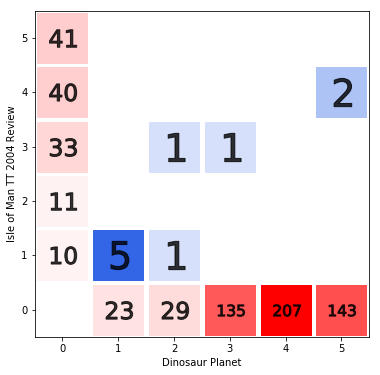

In [233]:
plt.figure(figsize=(6,6))

cmap_na = lsc.from_list("", ["white","red"])
cmap_nz = lsc.from_list("", ["white",(.2,.4,.9,1)])

plt.scatter(x1_na,x2_na,c=[x/max(n_na+(1,)) for x in n_na],cmap=cmap_na,marker="s",s=2500)
plt.scatter(x1_nz,x2_nz,c=[x/max(n_nz+(1,)) for x in n_nz],cmap=cmap_nz,marker="s",s=2500)

# These look kinda weird. 
for i in range(len(x1_na)):
    plt.scatter(x1_na[i],x2_na[i],c="black",marker=f"${n_na[i]}$" if n_na[i]>0 else "",s=800,alpha=0.8)
for i in range(len(x1_nz)):
    plt.scatter(x1_nz[i],x2_nz[i],c="black",marker=f"${n_nz[i]}$" if n_nz[i]>0 else "",s=800,alpha=0.8)

plt.xlim(-0.5,5.5)
plt.ylim(-0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()